In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [39]:
dataset=pd.read_csv("/content/Social_Network_Ads.csv")
dataset

,UserID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [40]:
dataset.head()

,UserID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [41]:
dataset.drop(columns=['UserID', 'Gender'], inplace=True)

In [42]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

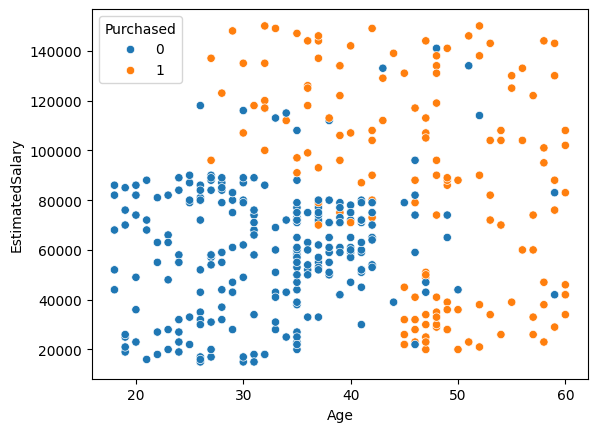

In [43]:
sns.scatterplot(data=dataset, x='Age', y='EstimatedSalary', hue='Purchased')

In [44]:
x=dataset.iloc[:,:-1]
y=dataset['Purchased']

In [45]:
from  sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x), columns=x.columns)
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [47]:
# we change n_neighbours value but it's default value is 5
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [48]:
knn.score(x_test, y_test)*100

92.5

In [49]:
knn.predict([[-1.781797, -1.490046]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

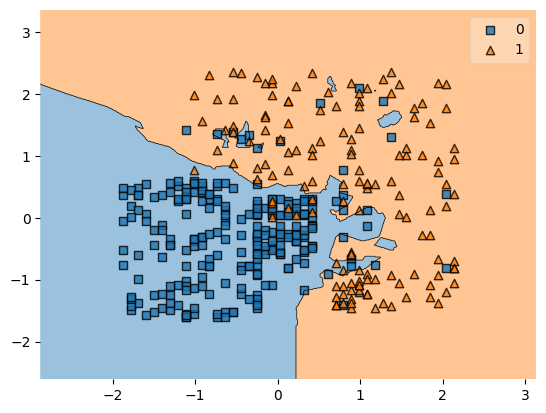

In [52]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=knn)

In [53]:
# check it is overfitting or not

knn.score(x_train, y_train)*100

92.5

In [54]:
# by loop we find the best n_neighbors
for i in range(1, 30):
  knn1=KNeighborsClassifier(n_neighbors=i)
  knn1.fit(x_train, y_train)
  print( "Train :" , knn1.score(x_train, y_train)*100, "Test :",  knn1.score(x_test, y_test)*100)

Train : 99.6875 Test : 85.0
Train : 91.25 Test : 86.25
Train : 92.5 Test : 92.5
Train : 91.5625 Test : 92.5
Train : 90.9375 Test : 92.5
Train : 90.9375 Test : 90.0
Train : 91.875 Test : 93.75
Train : 90.625 Test : 92.5
Train : 91.25 Test : 93.75
Train : 90.625 Test : 92.5
Train : 90.9375 Test : 92.5
Train : 91.25 Test : 92.5
Train : 91.5625 Test : 92.5
Train : 90.625 Test : 92.5
Train : 90.625 Test : 92.5
Train : 90.0 Test : 92.5
Train : 90.3125 Test : 92.5
Train : 90.0 Test : 92.5
Train : 90.9375 Test : 92.5
Train : 90.0 Test : 93.75
Train : 90.3125 Test : 92.5
Train : 90.0 Test : 93.75
Train : 90.3125 Test : 93.75
Train : 89.375 Test : 93.75
Train : 90.0 Test : 93.75
Train : 89.375 Test : 93.75
Train : 89.375 Test : 92.5
Train : 88.75 Test : 93.75
Train : 88.75 Test : 93.75
